In [1]:
import torch
import train
import model
import numpy as np
import csvLoader as cl
import visualizer as vs
import dataLoader as dl
import dataAugmentation as da
import torch.optim as optim
from torch.utils.data.sampler import SubsetRandomSampler, SequentialSampler

GPU mode: True
Len of train csv: 7049
Loading Dataset...
Randomly Visualizing...


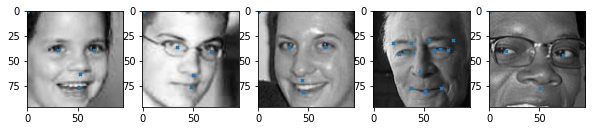

In [2]:
TRAIN_CSV_PATH = 'facial-keypoints-detection/training/training.csv'
TEST_CSV_PATH = 'facial-keypoints-detection/test/test.csv'

USE_GPU, device = train.check_GPU()
print('GPU mode: {}'.format(USE_GPU))

train_csv = cl.load_csv(TRAIN_CSV_PATH)

print(f'Len of train csv: {len(np.array(train_csv.Image))}')
csv_allValid, csv_autoFill, csv_missingOnly = cl.clean_csv(train_csv)

print('Loading Dataset...')
autoFill_dataset = dl.FacialKptsDataSet(csv_autoFill)
print('Randomly Visualizing...')
vs.rand_vis_dataset(autoFill_dataset, 5)

In [3]:
# Mirror
mirror_set = da.create_augs_from_transform(csv_autoFill, da.mirror, params=[None])
print('Size of Original set - {}\nSize of Mirror Aug sets list - {}'.format(len(autoFill_dataset), len(mirror_set)))

Size of Original set - 7049
Size of Mirror Aug sets list - 1


Visualizing dataset #0...


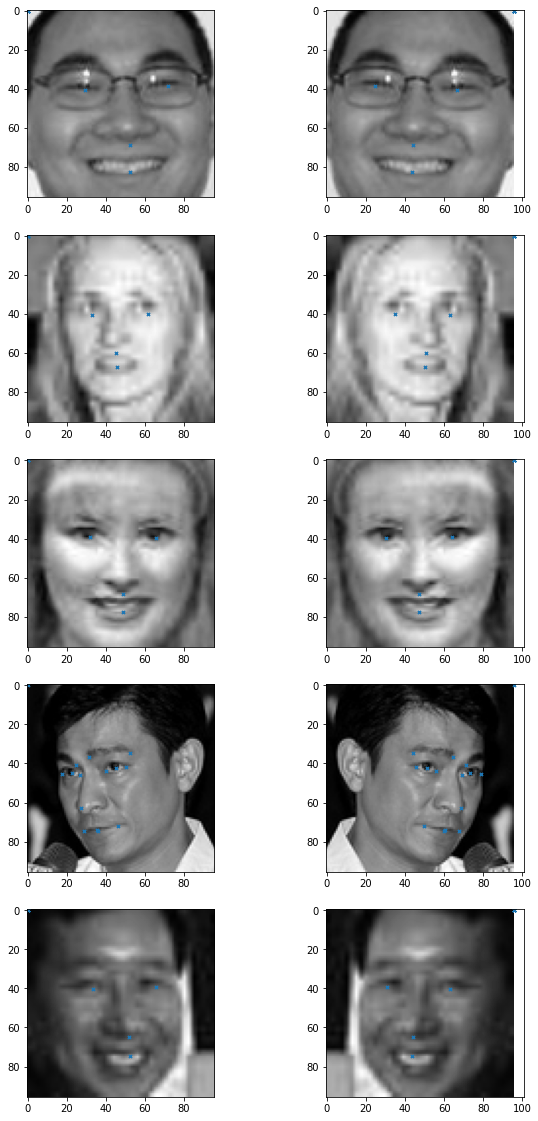

In [4]:
vs.rand_vis_compare_orig_augset(autoFill_dataset, mirror_set, 5)

Visualizing dataset #0...
Visualizing dataset #1...


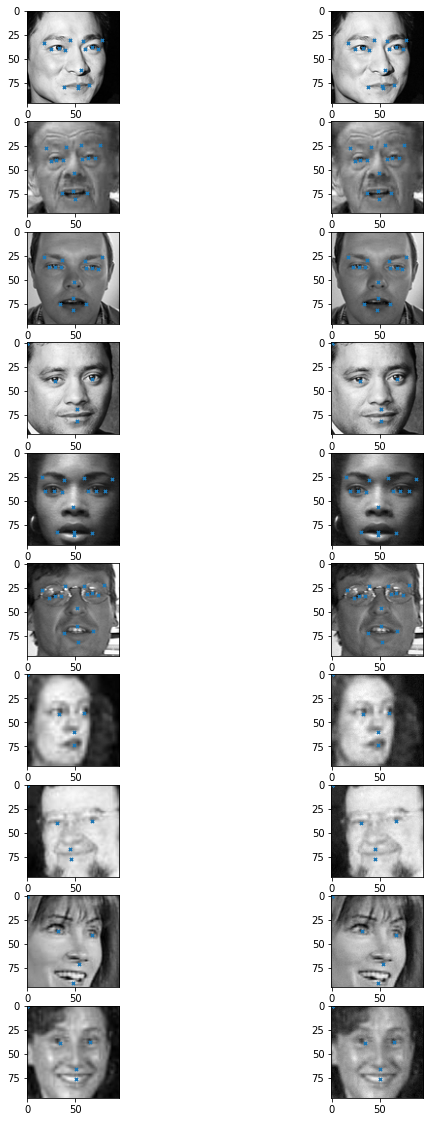

In [5]:
# Add Noise
noise_set = da.create_augs_from_transform(csv_autoFill, da.add_noise, params=[0.008, 0.02])
vs.rand_vis_compare_orig_augset(autoFill_dataset, noise_set, 5)

Visualizing dataset #0...
Visualizing dataset #1...
Visualizing dataset #2...
Visualizing dataset #3...


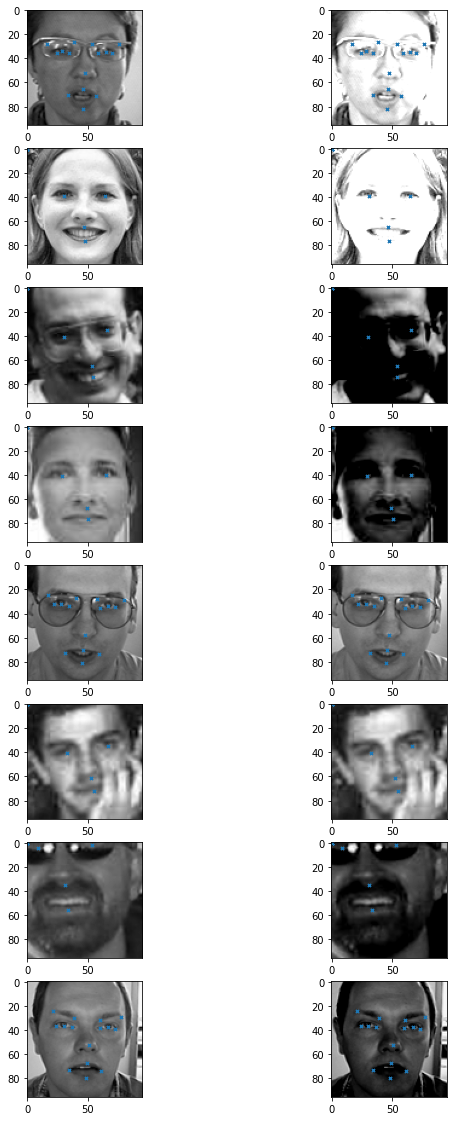

In [6]:
# Brightness Trim
brigtTrim_set = da.create_augs_from_transform(csv_autoFill, da.brightness_trim, params=[1, -1, 0.5, -0.5])
vs.rand_vis_compare_orig_augset(autoFill_dataset, brigtTrim_set, 2)

Visualizing dataset #0...
Visualizing dataset #1...
Visualizing dataset #2...
Visualizing dataset #3...


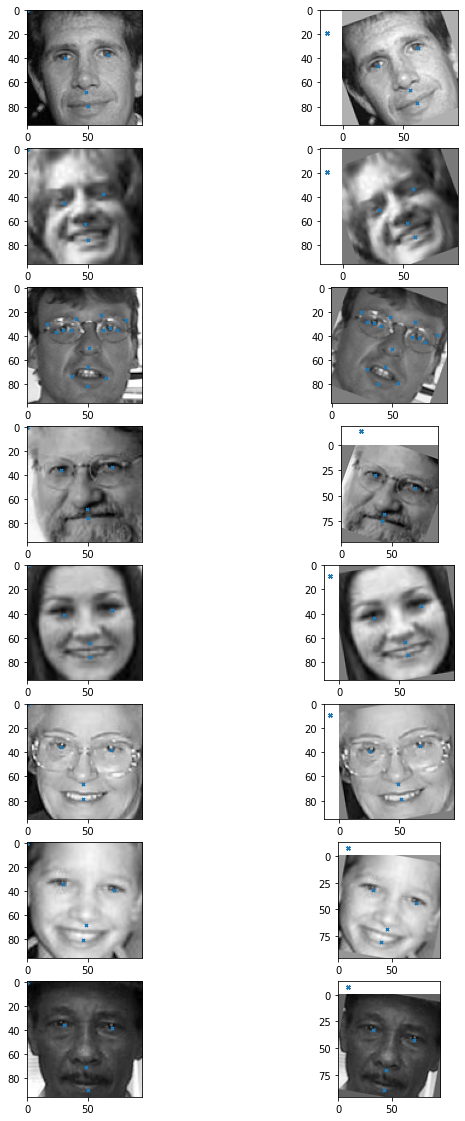

In [7]:
# Rotation
brigtTrim_set = da.create_augs_from_transform(csv_autoFill, da.rotate, params=[20, -20, 10, -10])
vs.rand_vis_compare_orig_augset(autoFill_dataset, brigtTrim_set, 2)